In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
df_train = pd.read_csv('../input/jigsaw-unintended-bias-in-toxicity-classification/train.csv')

# df_train = pd.read_csv('/content/drive/MyDrive/1017 Project (Spring 2023)/Data/train.csv')

In [ ]:
df_train.info(null_counts=True)

<ipython-input-40-f419718548a0>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df_train.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1804874 entries, 0 to 1804873
Data columns (total 45 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   id                                   1804874 non-null  int64  
 1   target                               1804874 non-null  float64
 2   comment_text                         1804874 non-null  object 
 3   severe_toxicity                      1804874 non-null  float64
 4   obscene                              1804874 non-null  float64
 5   identity_attack                      1804874 non-null  float64
 6   insult                               1804874 non-null  float64
 7   threat                               1804874 non-null  float64
 8   asian                                405130 non-null   float64
 9   atheist                              405130 non-null   float64
 10  bisexual                             405130 non-null   float64
 11

In [ ]:
df_train.describe()

,id,target,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,...,parent_id,article_id,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
count,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,405130.000000,405130.000000,405130.000000,...,1.026228e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06
mean,3.738434e+06,1.030173e-01,4.582099e-03,1.387721e-02,2.263571e-02,8.115273e-02,9.311271e-03,0.011964,0.003205,0.001884,...,3.722687e+06,2.813597e+05,2.779269e-01,4.420696e-02,1.091173e-01,2.446167e+00,5.843688e-01,6.605974e-03,1.439019e+00,8.784694e+00
std,2.445187e+06,1.970757e-01,2.286128e-02,6.460419e-02,7.873156e-02,1.760657e-01,4.942218e-02,0.087166,0.050193,0.026077,...,2.450261e+06,1.039293e+05,1.055313e+00,2.449359e-01,4.555363e-01,4.727924e+00,1.866589e+00,4.529782e-02,1.787041e+01,4.350086e+01
min,5.984800e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,6.100600e+04,2.006000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
25%,7.969752e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,7.960188e+05,1.601200e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
50%,5.223774e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,5.222993e+06,3.321260e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
75%,5.769854e+06,1.666667e-01,0.000000e+00,0.000000e+00,0.000000e+00,9.090909e-02,0.000000e+00,0.000000,0.000000,0.000000,...,5.775758e+06,3.662370e+05,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00
max,6.334010e+06,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,...,6.333965e+06,3.995410e+05,1.020000e+02,2.100000e+01,3.100000e+01,3.000000e+02,1.870000e+02,1.000000e+00,1.866000e+03,4.936000e+03


In [ ]:
# creating a column of max value of 9 identities columns
identities = ['male', 'female', 'homosexual_gay_or_lesbian', 'christian', 'jewish', 'muslim', \
          'black', 'white', 'psychiatric_or_mental_illness']

df_train['max_of_identities'] = df_train[identities].dropna().max(axis=1)
df_train['has_indentities'] = 1

In [ ]:
# print(df_train.loc[df_train[identities].isna()])
# df_train

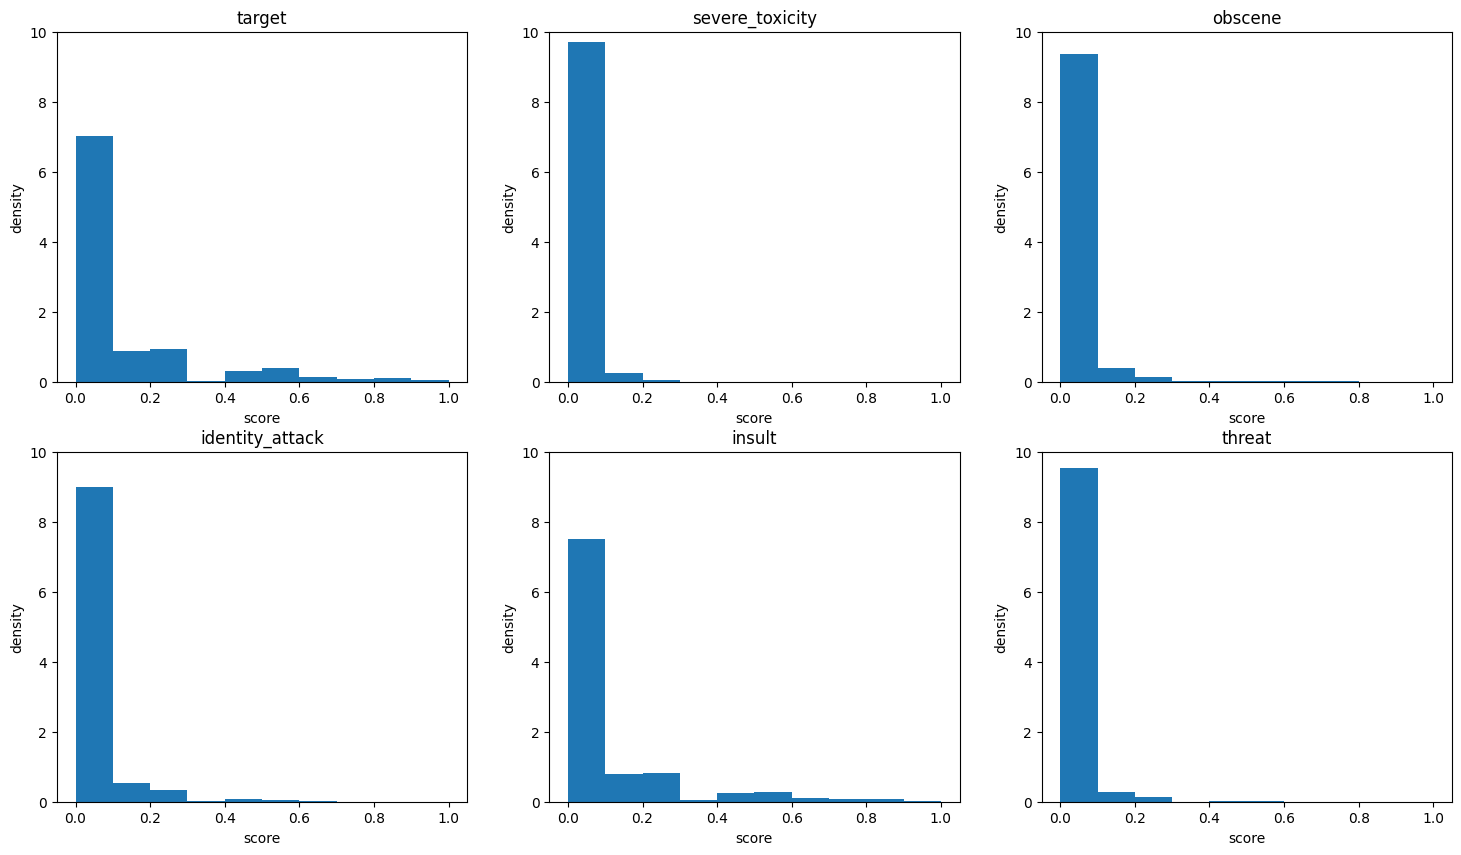

In [ ]:
# plotting distributions of target variables
targets = ['target', 'severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat', \
          'male', 'female', 'homosexual_gay_or_lesbian', 'christian', 'jewish', 'muslim', \
          'black', 'white', 'psychiatric_or_mental_illness']

targets_toxicity = ['target', 'severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat']

target_identity = ['male', 'female', 'homosexual_gay_or_lesbian', 'christian', 'jewish', 'muslim', \
          'black', 'white', 'psychiatric_or_mental_illness']

fig, axs = plt.subplots(2, 3, figsize=(18, 10))

for i in range(6):
  r = i//3
  c = i%3
  axs[r, c].hist(df_train[targets_toxicity[i]], density=True)
  axs[r, c].set_title(targets_toxicity[i])
  axs[r, c].set_ylim([0, 10])
  axs[r, c].set_xlabel('score')
  axs[r, c].set_ylabel('density')

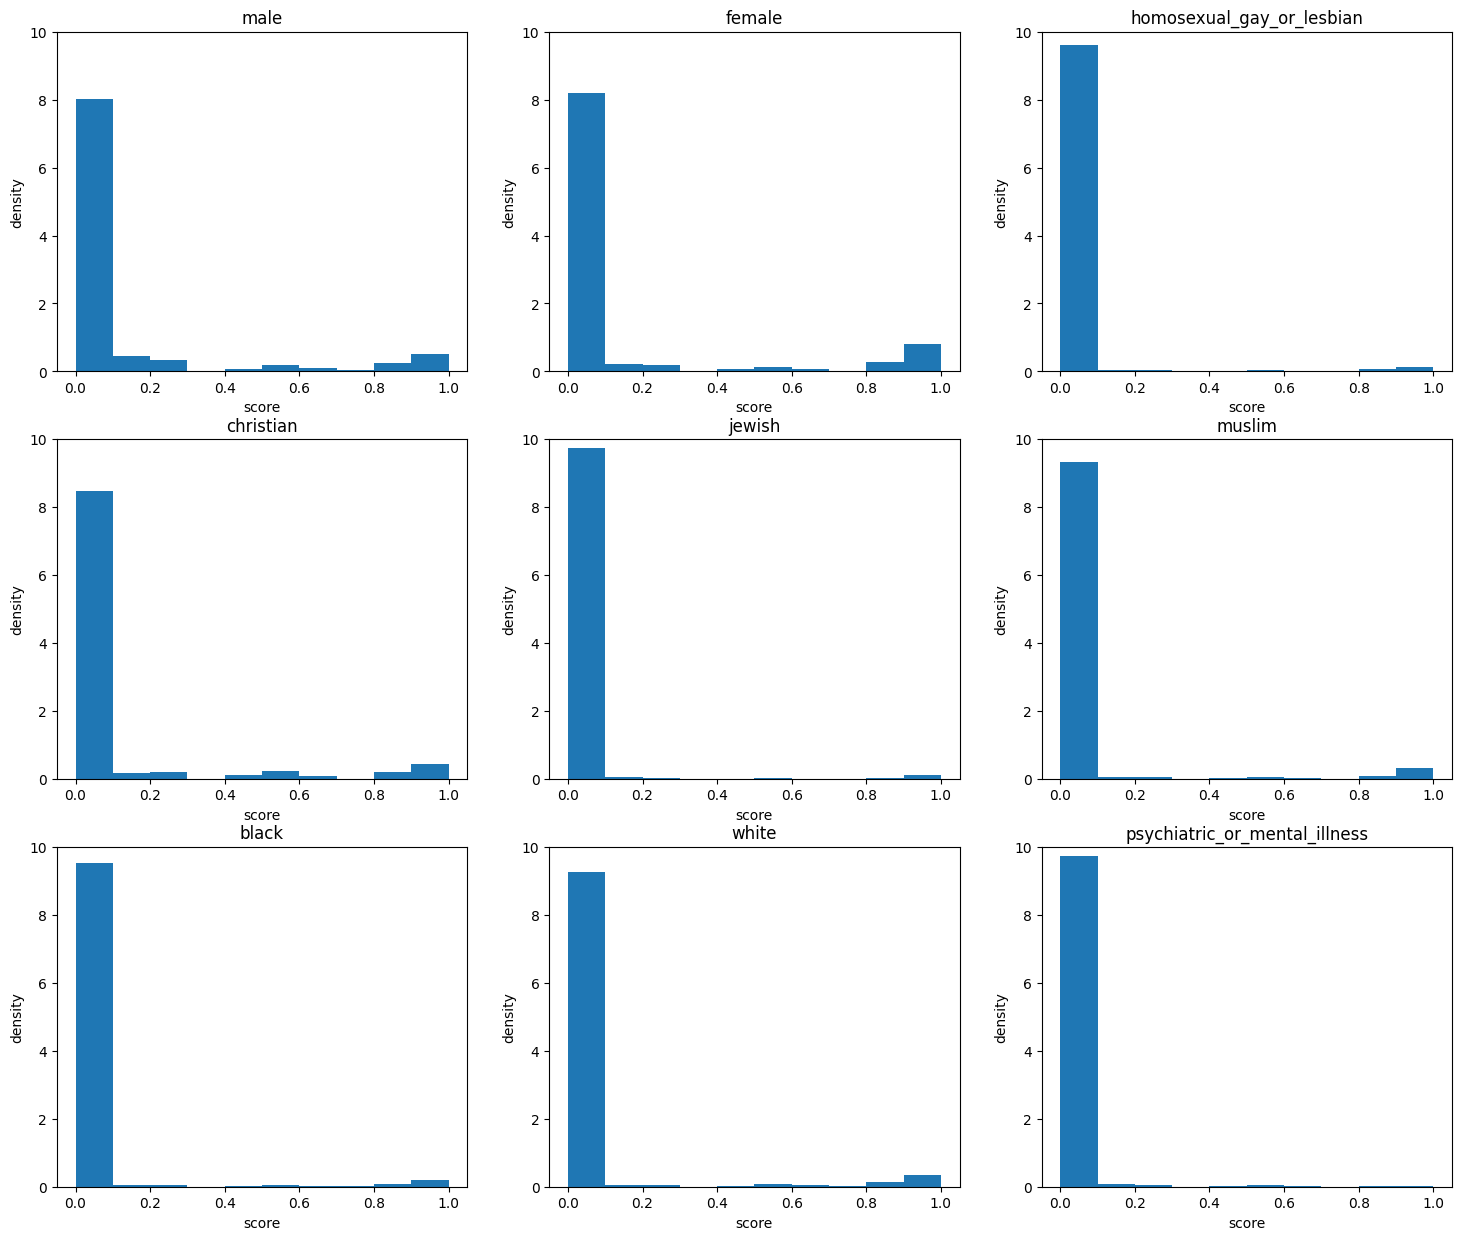

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(18, 15))

for i in range(9):
  r = i//3
  c = i%3
  axs[r, c].hist(df_train[target_identity[i]], density=True)
  axs[r, c].set_title(target_identity[i])
  axs[r, c].set_ylim([0, 10])
  axs[r, c].set_xlabel('score')
  axs[r, c].set_ylabel('density')

In [ ]:
counts_toxicity = pd.DataFrame(columns=targets_toxicity, index=['score<0.5', 'score>=0.5'])
counts_identity = pd.DataFrame(columns=target_identity, index=['score<0.5', 'score>=0.5'])

toxicity_less = {}
toxicity_greater = {}
for i in range(len(targets_toxicity)):
  counts_toxicity.iloc[0, i] = df_train[df_train[targets_toxicity[i]] < 0.5].shape[0]
  counts_toxicity.iloc[1, i] = df_train[df_train[targets_toxicity[i]] >= 0.5].shape[0]

counts_toxicity

,target,severe_toxicity,obscene,identity_attack,insult,threat
score<0.5,1660540,1804861,1795271,1791464,1698340,1800594
score>=0.5,144334,13,9603,13410,106534,4280


In [ ]:
counts_identity = pd.DataFrame(columns=target_identity, index=['score<0.5', 'score>=0.5'])

toxicity_less = {}
toxicity_greater = {}
for i in range(len(target_identity)):
  counts_identity.iloc[0, i] = df_train[df_train[target_identity[i]] < 0.5].shape[0]
  counts_identity.iloc[1, i] = df_train[df_train[target_identity[i]] >= 0.5].shape[0]

counts_identity

,male,female,homosexual_gay_or_lesbian,christian,jewish,muslim,black,white,psychiatric_or_mental_illness
score<0.5,360646,351701,394133,364707,397479,384124,390229,380048,400241
score>=0.5,44484,53429,10997,40423,7651,21006,14901,25082,4889


<Axes: >

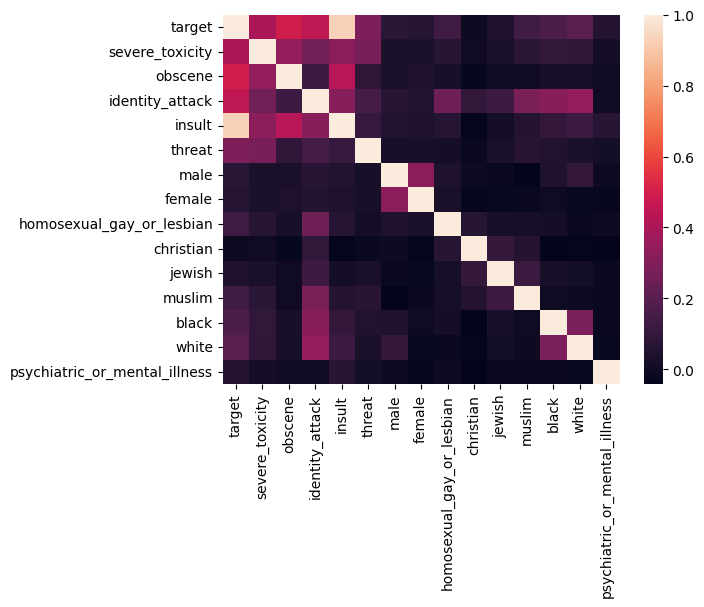

In [ ]:
sns.heatmap(df_train[targets].corr())